<a href="https://colab.research.google.com/github/Bipin-6751/Machine-Learning-Collection/blob/master/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9298314004_c1a8146521.jpg'),
 PosixPath('datasets/flower_photos/roses/8125886145_ae99f91fd0.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg'),
 PosixPath('datasets/flower_photos/roses/3654988152_b11178bbcb.jpg')]

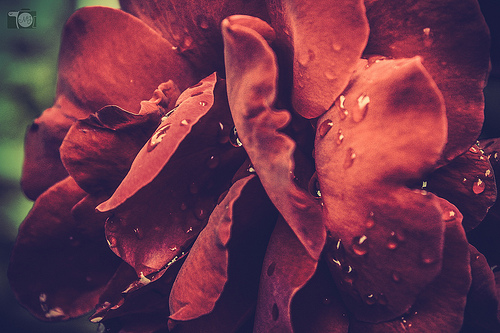

In [8]:
PIL.Image.open(str(roses[1]))

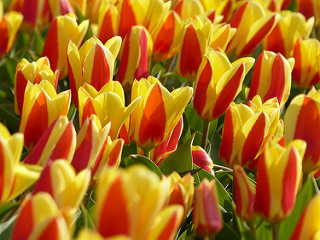

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [12]:
len(flowers_images_dict['roses'])

641

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [16]:
img = cv2.imread(str(flowers_images_dict['roses'][1]))

In [17]:
img.shape

(333, 500, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
X[0]

array([[[ 27,  51,  50],
        [ 13,  42,  36],
        [ 13,  66,  57],
        ...,
        [ 74, 106, 112],
        [ 60,  90,  95],
        [ 53,  80,  84]],

       [[ 23,  48,  47],
        [ 17,  45,  39],
        [ 12,  62,  55],
        ...,
        [ 65,  97, 103],
        [ 56,  86,  91],
        [ 51,  79,  83]],

       [[ 28,  53,  52],
        [ 16,  45,  39],
        [ 20,  65,  59],
        ...,
        [ 57,  88,  94],
        [ 51,  81,  86],
        [ 47,  74,  78]],

       ...,

       [[ 56, 102, 107],
        [ 63, 115, 110],
        [ 63, 117, 119],
        ...,
        [ 85, 177, 172],
        [ 77, 175, 169],
        [ 72, 175, 168]],

       [[ 63, 104, 108],
        [ 65, 111, 109],
        [ 64, 114, 115],
        ...,
        [ 85, 177, 172],
        [ 79, 176, 170],
        [ 75, 177, 170]],

       [[ 75, 113, 115],
        [ 68, 108, 109],
        [ 63, 111, 112],
        ...,
        [ 85, 177, 172],
        [ 79, 177, 171],
        [ 75, 177, 170]]

In [20]:
X = np.array(X)
y = np.array(y)

In [22]:
X[0]

array([[[ 27,  51,  50],
        [ 13,  42,  36],
        [ 13,  66,  57],
        ...,
        [ 74, 106, 112],
        [ 60,  90,  95],
        [ 53,  80,  84]],

       [[ 23,  48,  47],
        [ 17,  45,  39],
        [ 12,  62,  55],
        ...,
        [ 65,  97, 103],
        [ 56,  86,  91],
        [ 51,  79,  83]],

       [[ 28,  53,  52],
        [ 16,  45,  39],
        [ 20,  65,  59],
        ...,
        [ 57,  88,  94],
        [ 51,  81,  86],
        [ 47,  74,  78]],

       ...,

       [[ 56, 102, 107],
        [ 63, 115, 110],
        [ 63, 117, 119],
        ...,
        [ 85, 177, 172],
        [ 77, 175, 169],
        [ 72, 175, 168]],

       [[ 63, 104, 108],
        [ 65, 111, 109],
        [ 64, 114, 115],
        ...,
        [ 85, 177, 172],
        [ 79, 176, 170],
        [ 75, 177, 170]],

       [[ 75, 113, 115],
        [ 68, 108, 109],
        [ 63, 111, 112],
        ...,
        [ 85, 177, 172],
        [ 79, 177, 171],
        [ 75, 177, 170]]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [25]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 15s 46ms/step - loss: 1.4012 - accuracy: 0.4288
Epoch 2/30
86/86 [==============================] - 4s 45ms/step - loss: 1.0018 - accuracy: 0.6014
Epoch 3/30
86/86 [==============================] - 4s 45ms/step - loss: 0.8611 - accuracy: 0.6708
Epoch 4/30
86/86 [==============================] - 4s 45ms/step - loss: 0.6443 - accuracy: 0.7645
Epoch 5/30
86/86 [==============================] - 4s 46ms/step - loss: 0.4470 - accuracy: 0.8496
Epoch 6/30
86/86 [==============================] - 4s 46ms/step - loss: 0.2598 - accuracy: 0.9135
Epoch 7/30
86/86 [==============================] - 4s 46ms/step - loss: 0.1291 - accuracy: 0.9677
Epoch 8/30
86/86 [==============================] - 4s 45ms/step - loss: 0.1338 - accuracy: 0.9571
Epoch 9/30
86/86 [==============================] - 4s 45ms/step - loss: 0.0642 - accuracy: 0.9836
Epoch 10/30
86/86 [==============================] - 4s 45ms/step - loss: 0.0399 - accuracy: 0.9916
Epoch 11

In [26]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 28ms/step - loss: 2.5607 - accuracy: 0.6111


[2.5606753826141357, 0.6111111044883728]

the testing accuracy shows the overfitting of the model, now we can use data augmentation to reduce over fitting

In [27]:
predictions = model.predict(X_test_scaled)
predictions

array([[-4.601677  ,  1.984624  , -1.3975825 ,  5.7562423 ,  2.720474  ],
       [11.600257  , -6.494114  , -8.0679655 , -0.7171001 , 14.801802  ],
       [-2.0880167 , -4.500396  ,  6.537905  ,  5.9730783 , -0.9025432 ],
       ...,
       [-6.377328  ,  3.0487883 , -3.055489  , 25.839214  , -8.00993   ],
       [ 1.8040675 ,  5.256908  , -0.8713541 , -0.34807268,  2.2231553 ],
       [-0.38293138, -0.6575378 , -4.4774833 , 11.716423  , -1.9680454 ]],
      dtype=float32)

In [33]:
score = tf.nn.softmax(predictions[1])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.9107624e-02, 5.4197097e-10, 1.1232111e-10, 1.7494489e-07,
       9.6089220e-01], dtype=float32)>

In [34]:
np.argmax(score)

4

In [35]:
y_test[:5]

array([1, 0, 2, 4, 2])

In [37]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

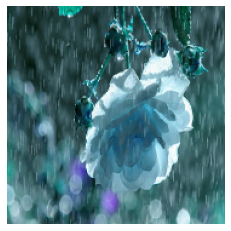

In [36]:
plt.axis('off')
plt.imshow(X[0])

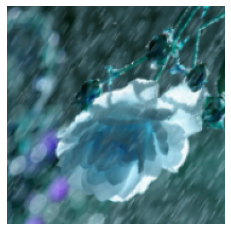

In [38]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [39]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)  

Epoch 1/30
86/86 [==============================] - 6s 53ms/step - loss: 1.5089 - accuracy: 0.3172
Epoch 2/30
86/86 [==============================] - 4s 52ms/step - loss: 1.1889 - accuracy: 0.5160
Epoch 3/30
86/86 [==============================] - 5s 53ms/step - loss: 0.9870 - accuracy: 0.6090
Epoch 4/30
86/86 [==============================] - 5s 57ms/step - loss: 0.8964 - accuracy: 0.6523
Epoch 5/30
86/86 [==============================] - 5s 54ms/step - loss: 0.8648 - accuracy: 0.6613
Epoch 6/30
86/86 [==============================] - 4s 52ms/step - loss: 0.7903 - accuracy: 0.6933
Epoch 7/30
86/86 [==============================] - 4s 52ms/step - loss: 0.7585 - accuracy: 0.7115
Epoch 8/30
86/86 [==============================] - 4s 52ms/step - loss: 0.7426 - accuracy: 0.7089
Epoch 9/30
86/86 [==============================] - 4s 52ms/step - loss: 0.6963 - accuracy: 0.7333
Epoch 10/30
86/86 [==============================] - 4s 52ms/step - loss: 0.6747 - accuracy: 0.7478
Epoch 11/

In [40]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 0.7936 - accuracy: 0.7505


[0.7935795187950134, 0.7505446672439575]